In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

In [3]:
# Cargar la base de datos
data = pd.read_csv('CC GENERAL.csv')
# 1. Verificar valores nulos
print("Valores nulos por columna:")
print(data.isnull().sum())

Valores nulos por columna:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [ ]:
## Imputacion de la mediana en las variables con nulls
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)


In [ ]:
# 2. Descripción estadística de las variables numéricas
print("\nDescripción estadística:")
print(data.describe())


Descripción estadística:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      

In [ ]:
#  Borrar customer id
data.drop(['CUST_ID'],axis=1,inplace =True)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


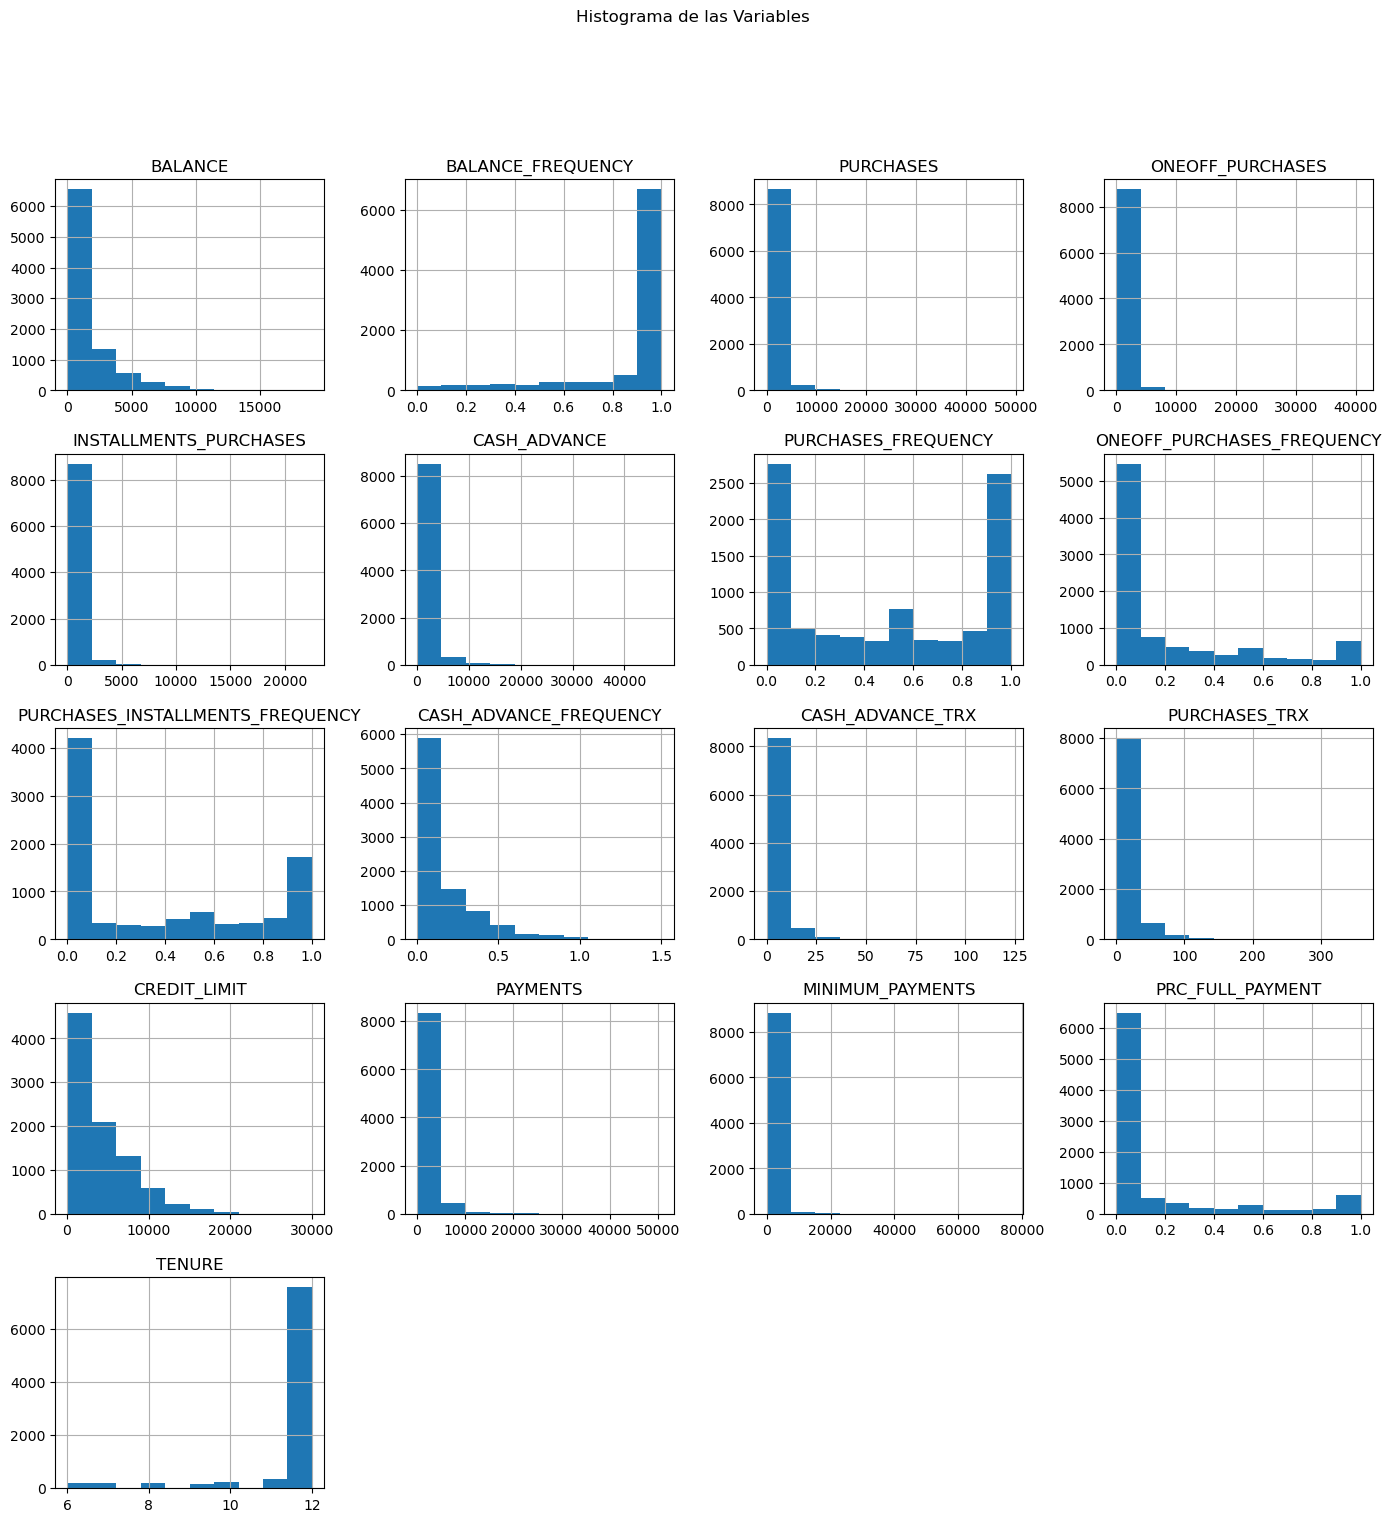

In [ ]:
#Hacer un histograma
data.hist(bins=10, figsize=(17, 17))
plt.suptitle('Histograma de las Variables')
plt.show()

## Revisión de Outliers

0

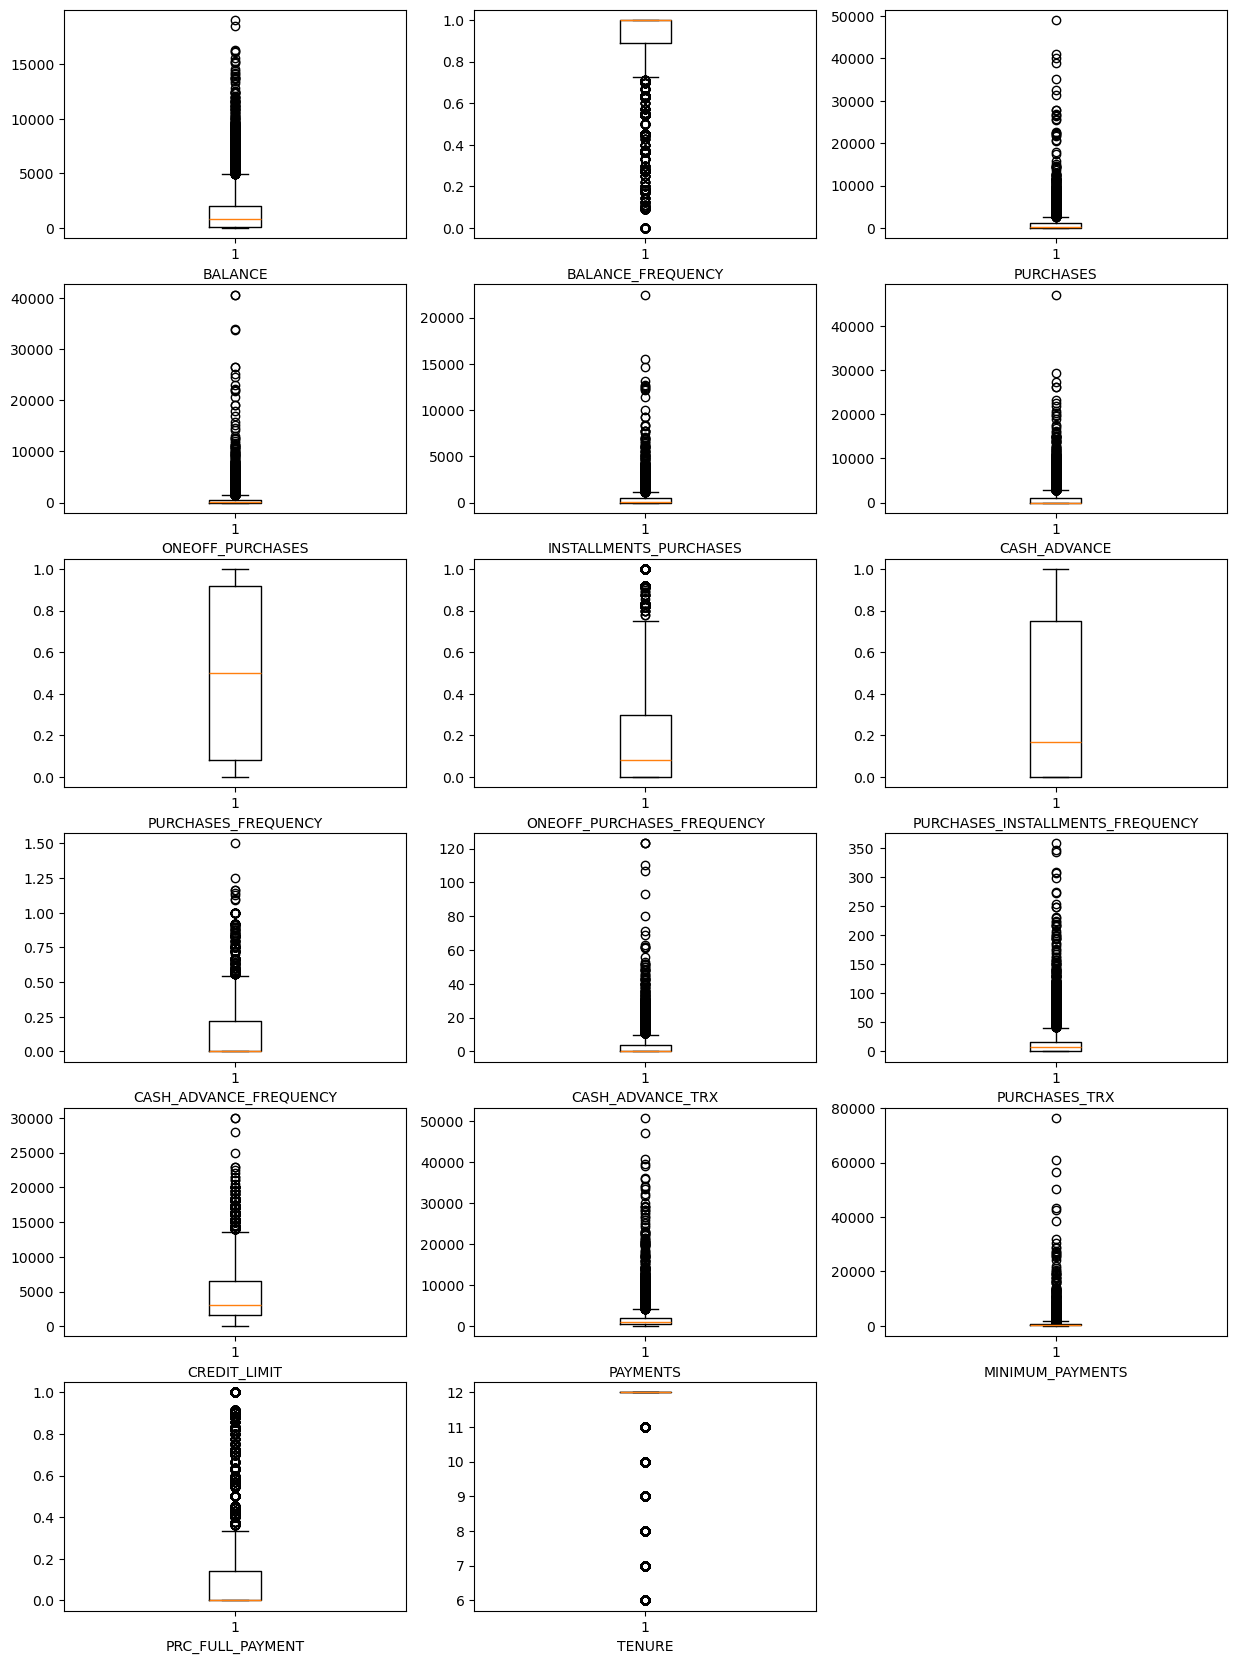

In [ ]:
# Checking for outliers
%matplotlib inline
plt.figure(figsize= (15,60))

for i in range(0,17):
    plt.subplot(17, 3, i+1)
    plt.xlabel(data.columns[i])
    plt.boxplot(data[data.columns[i]])

#plt.show

data.duplicated().sum()

# Tenemos valores atípicos en casi todas las variables, pero no los eliminaremos ni imputaremos,
# ya que estos valores son importantes para el análisis, dado que cada cliente tiene patrones de gasto distintos,
# lo cual naturalmente genera una gran variación en los valores.
# Además, muchas variables tienen valores de 0, lo que impide aplicar una transformación logarítmica en el dataframe.


In [ ]:
# Analisis de correlacion de las variables
correlation_matrix = data.corr()
correlation_matrix
#plt.figure(figsize=(14,10))
#sns.heatmap(correlation_matrix,vmin=1, vmax=-1, annot= True)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531296,0.322802,0.397920,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095931,0.065008,0.131181,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356977,0.603264,0.095789,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319735,0.567292,0.050256,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256515,0.384084,0.134019,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303997,0.453238,0.140747,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119833,0.103464,0.006154,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295059,0.243537,-0.027311,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060794,0.085551,0.032055,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132608,0.183192,0.100616,-0.249773,-0.133372


C:\Users\Pedro Olvera\AppData\Local\Temp\ipykernel_35552\1563301185.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[i]], kde_kws={'bw': 0.05,'lw':2}, color='red')
C:\Users\Pedro Olvera\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.05`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\Pedro Olvera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

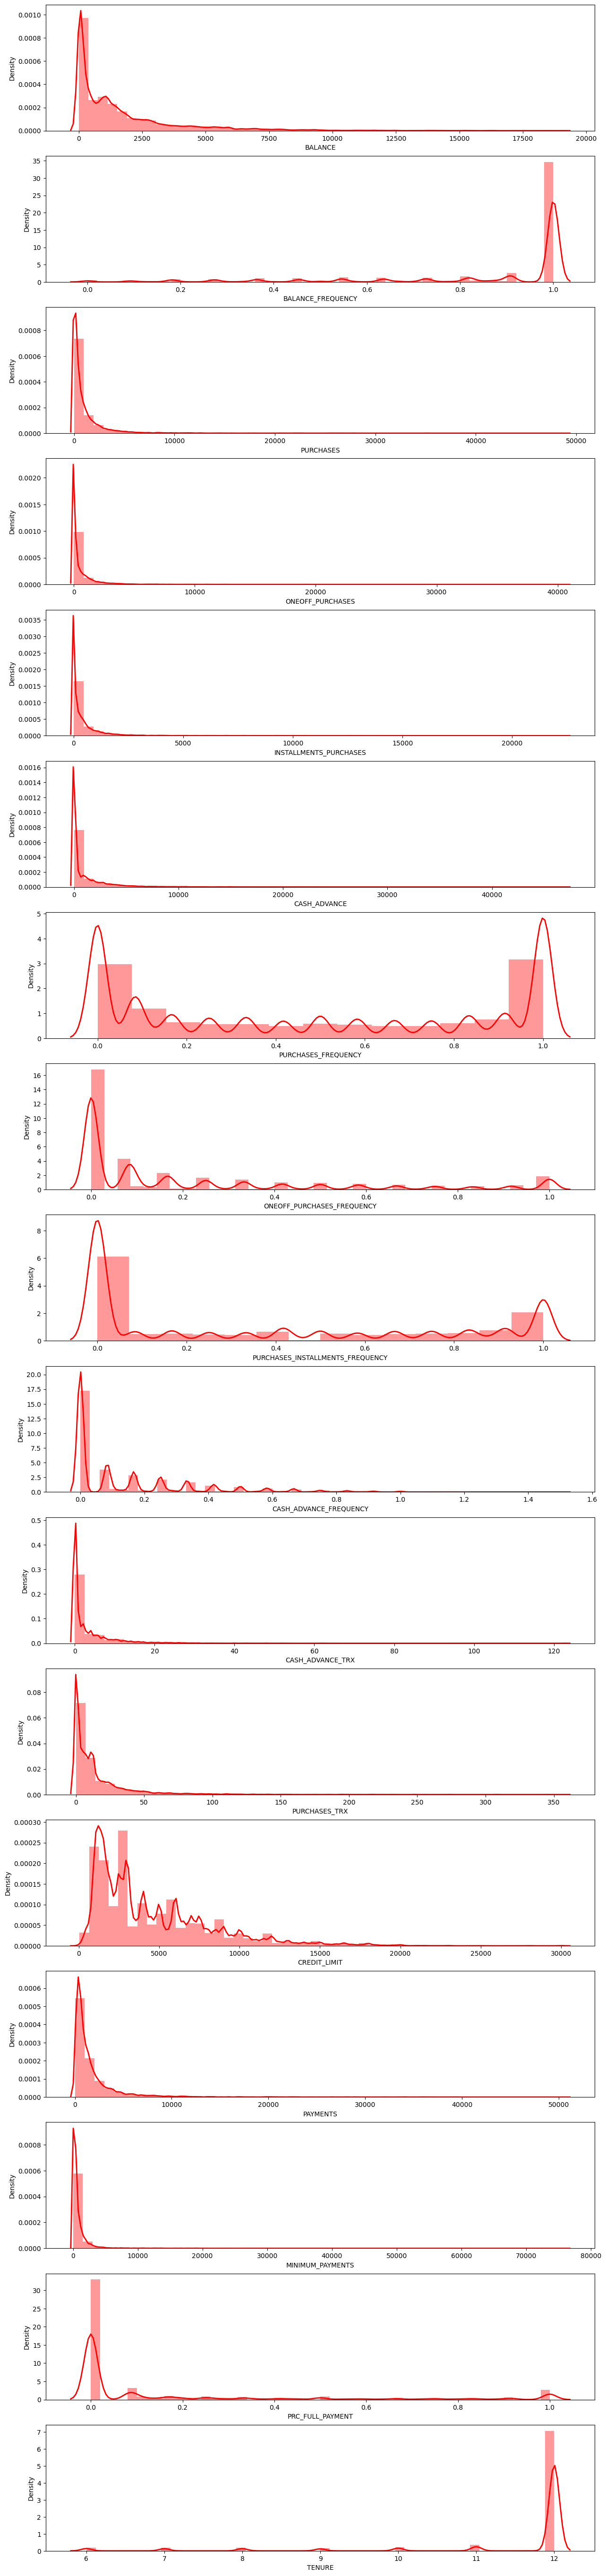

In [ ]:
plt.figure(figsize=(15,70))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(data[data.columns[i]], kde_kws={'bw': 0.05,'lw':2}, color='red')
plt.tight_layout

## Creación de nuevos features

In [ ]:
# PAYMENT_RATIO (Proporción de Pagos Realizados)
data['PAYMENT_RATIO'] = data['PAYMENTS'] / data['BALANCE']
data['PAYMENT_RATIO'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)
data['PAYMENT_RATIO'] = data['PAYMENT_RATIO'].fillna(0)

In [ ]:
# PURCHASES_TO_LIMIT_RATIO (Proporción de Compras respecto al Límite de Crédito
data['PURCHASES_TO_LIMIT_RATIO'] = data['PURCHASES'] / data['CREDIT_LIMIT']
data['PURCHASES_TO_LIMIT_RATIO'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)
data['PURCHASES_TO_LIMIT_RATIO'] = data['PURCHASES_TO_LIMIT_RATIO'].fillna(0)

In [ ]:
# CASH_ADVANCE_RATIO (Proporción de Adelantos de Efectivo sobre el Saldo)
data['CASH_ADVANCE_RATIO'] = data['CASH_ADVANCE'] / data['BALANCE']
data['CASH_ADVANCE_RATIO'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)
data['CASH_ADVANCE_RATIO'] = data['CASH_ADVANCE_RATIO'].fillna(0)

In [ ]:
# INSTALLMENT_PURCHASES_RATIO (Proporción de Compras a Plazos sobre el Total de Compras)
data['INSTALLMENT_PURCHASES_RATIO'] = data['INSTALLMENTS_PURCHASES'] / data['PURCHASES']
data['INSTALLMENT_PURCHASES_RATIO'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)
data['INSTALLMENT_PURCHASES_RATIO'] = data['INSTALLMENT_PURCHASES_RATIO'].fillna(0)

In [ ]:
# ACTIVE_CUSTOMER_RATIO (Proporción de Uso Activo de la Tarjeta)
data['ACTIVE_CUSTOMER_RATIO'] = data['PURCHASES_FREQUENCY'] / (data['PURCHASES_FREQUENCY'] + data['CASH_ADVANCE_FREQUENCY'])
data['ACTIVE_CUSTOMER_RATIO'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)
data['ACTIVE_CUSTOMER_RATIO'] = data['ACTIVE_CUSTOMER_RATIO'].fillna(0)

## Codificación de features categóricos

In [ ]:
# CREDIT_LIMIT
data['CREDIT_LIMIT_CAT'] = pd.qcut(
    data['CREDIT_LIMIT'],
    q=4,  # Dividir en 4 partes (cuartiles)
    labels=['Bajo', 'Medio Bajo', 'Medio Alto', 'Alto']
)

# Visualizar las primeras filas con la nueva variable categorizada
print(data[['CREDIT_LIMIT', 'CREDIT_LIMIT_CAT']].head())

# Opcional: Ver la distribución de cada categoría para verificar
print(data['CREDIT_LIMIT_CAT'].value_counts())

In [ ]:
#TENURE
data['TENURE_CAT'] = pd.cut(
    data['TENURE'],
    bins=[0, 6, 12, data['TENURE'].max()],
    labels=['Nuevo', 'Intermedio', 'Leal']

In [ ]:
#PURCHASES_FREQUENCY
data['PURCHASES_FREQUENCY_CAT'] = pd.cut(
    data['PURCHASES_FREQUENCY'],
    bins=[0, 0.33, 0.66, 1],
    labels=['Baja', 'Media', 'Alta'],
    include_lowest=True
)

In [ ]:
#BALANCE
data['LOG_BALANCE'] = np.log1p(data['BALANCE'])  # Aplicar log(1 + BALANCE) para manejar ceros
data['LOG_BALANCE_CAT'] = pd.qcut(
    data['LOG_BALANCE'],
    q=4,
    labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto'])



In [ ]:
data['PRC_FULL_PAYMENT_CAT'] = pd.cut(
    data['PRC_FULL_PAYMENT'],
    bins=[0, 0.2, 0.8, 1],
    labels=['No Pagador Completo', 'Pagador Parcial', 'Pagador Frecuente'],
    include_lowest=True
)